In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Credit-Card-Fraud-Detection/main/creditCardFraud_28011964_120214.csv")


In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [7]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

In [9]:
df.shape

(1001, 24)

In [10]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
df.isnull().sum().sum()

0

In [13]:
df.duplicated().sum()

0

In [14]:
df[df.duplicated()]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [15]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,167532.467532,1.589411,1.776224,1.604396,34.945055,-0.004995,-0.161838,-0.164835,-0.283716,-0.283716,...,40748.408591,39078.666334,38012.011988,5382.339660,5051.400599,4176.149850,4671.488511,5331.049950,5090.704296,0.213786
std,130587.921320,0.492187,0.750916,0.532298,9.219760,1.173446,1.228732,1.262459,1.184662,1.170224,...,68206.929510,63108.238729,63074.415024,12180.755275,15626.153184,10514.647502,13269.943983,16812.536877,23658.888052,0.410183
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-3684.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1423.000000,1206.000000,830.000000,1000.000000,390.000000,228.000000,148.000000,189.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17710.000000,17580.000000,15846.000000,2184.000000,1710.000000,1206.000000,1398.000000,1306.000000,1250.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48851.000000,46404.000000,46557.000000,5090.000000,4500.000000,3720.000000,4000.000000,3745.000000,3784.000000,0.000000
max,700000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,628699.000000,484612.000000,473944.000000,199646.000000,285138.000000,133657.000000,188840.000000,195599.000000,528666.000000,1.000000


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,1001.0,167532.467532,130587.921320,10000.0,50000.0,140000.0,240000.0,700000.0
SEX,1001.0,1.589411,0.492187,1.0,1.0,2.0,2.0,2.0
EDUCATION,1001.0,1.776224,0.750916,1.0,1.0,2.0,2.0,6.0
MARRIAGE,1001.0,1.604396,0.532298,0.0,1.0,2.0,2.0,3.0
AGE,1001.0,34.945055,9.219760,21.0,28.0,33.0,41.0,75.0
PAY_0,1001.0,-0.004995,1.173446,-2.0,-1.0,0.0,0.0,8.0
PAY_2,1001.0,-0.161838,1.228732,-2.0,-1.0,0.0,0.0,7.0
PAY_3,1001.0,-0.164835,1.262459,-2.0,-1.0,0.0,0.0,7.0
PAY_4,1001.0,-0.283716,1.184662,-2.0,-1.0,0.0,0.0,7.0
PAY_5,1001.0,-0.283716,1.170224,-2.0,-1.0,0.0,0.0,7.0


In [18]:
df.isna().sum().sum()

0

In [21]:
# sns.pairplot(df)

In [20]:
df.skew()

LIMIT_BAL                      1.011019
SEX                           -0.364047
EDUCATION                      0.875019
MARRIAGE                      -0.104653
AGE                            0.817570
PAY_0                          1.509158
PAY_2                          1.208410
PAY_3                          1.226851
PAY_4                          1.217037
PAY_5                          1.053218
PAY_6                          1.064620
BILL_AMT1                      2.671027
BILL_AMT2                      2.777126
BILL_AMT3                      2.901497
BILL_AMT4                      3.578203
BILL_AMT5                      3.107180
BILL_AMT6                      2.636691
PAY_AMT1                       7.749893
PAY_AMT2                      10.752948
PAY_AMT3                       6.744377
PAY_AMT4                       7.454775
PAY_AMT5                       7.034632
PAY_AMT6                      15.241538
default payment next month     1.398337
dtype: float64

In [145]:
X=df.drop('default payment next month',axis=1)
y=df['default payment next month']

In [146]:
y.value_counts()

0    787
1    214
Name: default payment next month, dtype: int64

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)

In [162]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((900, 23), (101, 23), (900,), (101,))

In [163]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [164]:
X_train_scaled

array([[ 0.08687516, -1.20512077,  0.28331819, ..., -0.26091692,
        -0.2221878 , -0.14820189],
       [-0.89804669, -1.20512077, -1.0378547 , ..., -0.18630231,
        -0.31377641, -0.16752541],
       [ 2.58706138,  0.82979235, -1.0378547 , ...,  0.0226932 ,
         1.23498702,  2.46252964],
       ...,
       [ 0.2384016 , -1.20512077, -1.0378547 , ..., -0.22166964,
        -0.13059919, -0.107088  ],
       [-0.67075703,  0.82979235, -1.0378547 , ...,  2.63412985,
        -0.20387008, -0.13997911],
       [-0.67075703,  0.82979235,  0.28331819, ..., -0.26464765,
        -0.24355848, -0.16731984]])

In [165]:
X_test_scaled

array([[ 3.89928034e-01,  8.29792352e-01,  2.83318186e-01, ...,
        -3.50454448e-01, -1.37254627e-01,  6.10127268e+00],
       [ 1.45061310e+00,  8.29792352e-01, -1.03785470e+00, ...,
        -3.02253411e-01, -9.95811774e-02, -2.09872710e-01],
       [ 1.11119388e-02, -1.20512077e+00,  1.60449107e+00, ...,
         2.26185892e-02, -8.48103766e-03, -4.30329869e-03],
       ...,
       [ 3.14164815e-01,  8.29792352e-01, -1.03785470e+00, ...,
        -3.28070065e-01, -5.42753438e-02, -1.72500191e-01],
       [-1.12533635e+00,  8.29792352e-01,  1.60449107e+00, ...,
        -3.50454448e-01, -3.13776412e-01, -2.09872710e-01],
       [-1.20109956e+00, -1.20512077e+00,  2.83318186e-01, ...,
        -2.38532537e-01, -3.13776412e-01, -1.07088004e-01]])

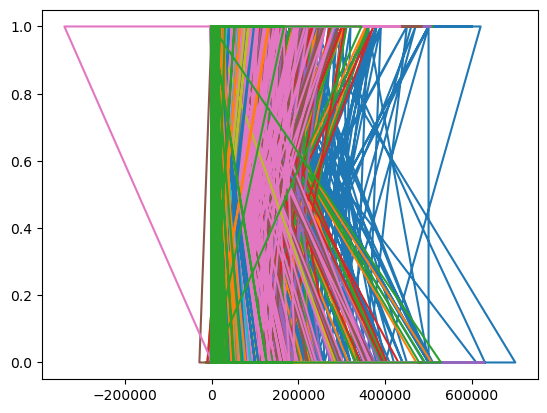

In [166]:
plt.plot(X_train,y_train)

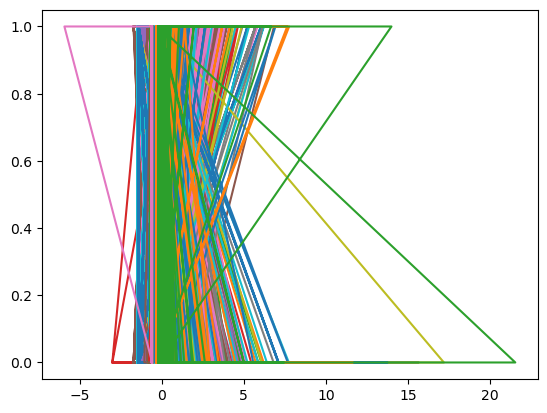

In [167]:
plt.plot(X_train_scaled,y_train)

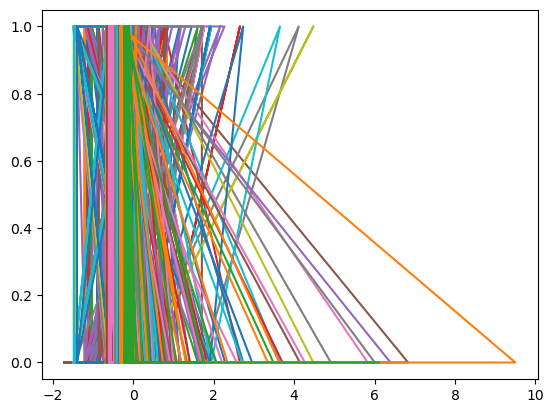

In [168]:
plt.plot(X_test_scaled,y_test)

In [169]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [170]:
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [171]:
y_pred=gnb.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


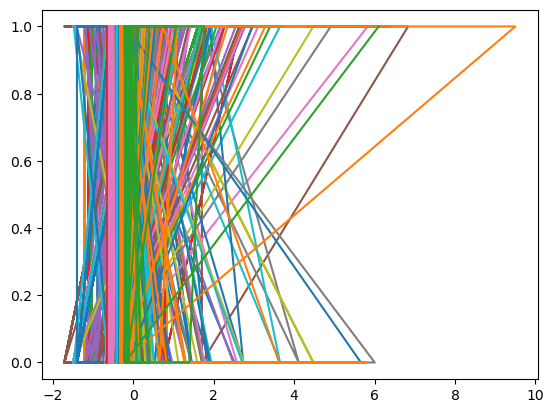

In [172]:
plt.plot(X_test_scaled,y_pred)

In [173]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [174]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.4158415841584158
[[31 52]
 [ 7 11]]
              precision    recall  f1-score   support

           0       0.82      0.37      0.51        83
           1       0.17      0.61      0.27        18

    accuracy                           0.42       101
   macro avg       0.50      0.49      0.39       101
weighted avg       0.70      0.42      0.47       101



In [175]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [176]:
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [180]:
y_pred_rfc=rfc.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


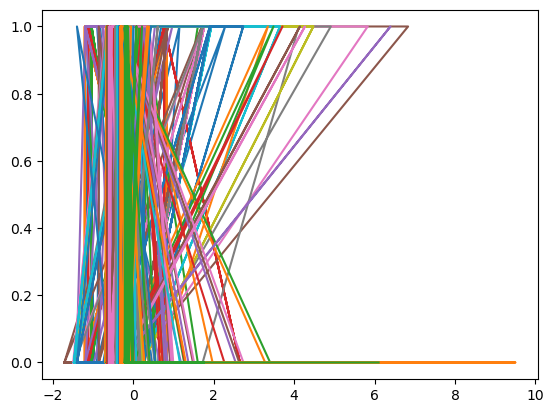

In [181]:
plt.plot(X_test_scaled,y_pred_rfc)

In [182]:
print(accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

0.7821782178217822
[[76  7]
 [15  3]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.87        83
           1       0.30      0.17      0.21        18

    accuracy                           0.78       101
   macro avg       0.57      0.54      0.54       101
weighted avg       0.74      0.78      0.76       101



In [183]:
from sklearn.model_selection import GridSearchCV

In [196]:
params={'max_depth':[10,12],
        'criterion': ['gini', 'entropy'],
        'n_estimators' :[20,100,150],
        'max_features':['sqrt', 'log2']
}

In [197]:
rfc=RandomForestClassifier()

In [199]:
cv=GridSearchCV(rfc,param_grid=params,cv=5,verbose=3)

In [200]:
cv

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [20, 100, 150]},
             verbose=3)

In [201]:
cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=20;, score=0.822 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=20;, score=0.772 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=20;, score=0.828 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=20;, score=0.800 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=20;, score=0.772 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.806 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.767 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.794 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=10, max_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [20, 100, 150]},
             verbose=3)

In [202]:
cv.best_estimator_

RandomForestClassifier(max_depth=12, max_features='log2')

In [203]:
cv.best_index_

10

In [204]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'log2',
 'n_estimators': 100}

In [205]:
cv.best_score_

0.8011111111111113

In [206]:
y_pred_gsv=cv.predict(X_test_scaled)

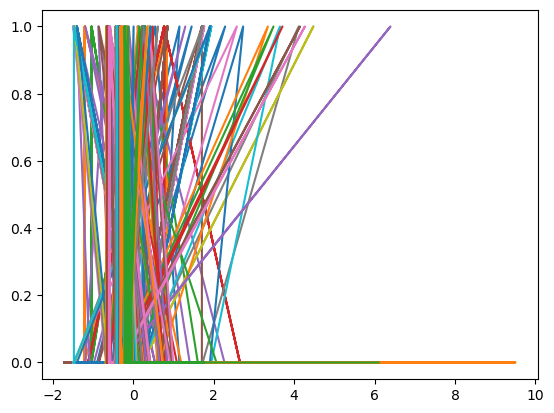

In [207]:
plt.plot(X_test_scaled,y_pred_gsv)

In [208]:
print(accuracy_score(y_test,y_pred_gsv))
print(confusion_matrix(y_test,y_pred_gsv))
print(classification_report(y_test,y_pred_gsv))

0.8316831683168316
[[80  3]
 [14  4]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        83
           1       0.57      0.22      0.32        18

    accuracy                           0.83       101
   macro avg       0.71      0.59      0.61       101
weighted avg       0.80      0.83      0.80       101



#### For testing on new data

In [212]:
X_train_scaled[0]

array([ 0.08687516, -1.20512077,  0.28331819, -1.12123361,  1.07741295,
       -0.8585092 ,  0.13291927,  0.13102497,  0.23384824,  0.23154616,
        0.25259406, -0.29838159, -0.27098277, -0.22337312, -0.16274427,
       -0.14248654, -0.10810345, -0.31927806, -0.19665795, -0.2942634 ,
       -0.26091692, -0.2221878 , -0.14820189])

In [214]:
y_train[0]

0

In [215]:
# new data prediction
pred1=cv.predict(np.array([[0.08687516, -1.20512077,  0.28331819, -1.12123361,  1.07741295,
       -0.8585092 ,  0.13291927,  0.13102497,  0.23384824,  0.23154616,
        0.25259406, -0.29838159, -0.27098277, -0.22337312, -0.16274427,
       -0.14248654, -0.10810345, -0.31927806, -0.19665795, -0.2942634 ,
       -0.26091692, -0.2221878 , -0.14820189]]))[0]

In [216]:
pred1

0

In [218]:
import joblib
joblib.dump(cv,'Credit-Card-Fraud-Prediction')

['Credit-Card-Fraud-Prediction']

In [219]:
modelccfd=joblib.load('Credit-Card-Fraud-Prediction')

In [220]:
modelccfd.predict(np.array([[0.08687516, -1.20512077,  0.28331819, -1.12123361,  1.07741295,
       -0.8585092 ,  0.13291927,  0.13102497,  0.23384824,  0.23154616,
        0.25259406, -0.29838159, -0.27098277, -0.22337312, -0.16274427,
       -0.14248654, -0.10810345, -0.31927806, -0.19665795, -0.2942634 ,
       -0.26091692, -0.2221878 , -0.14820189]]))[0]

0